In [1]:
# Chapter 7 Lab: Non-linear Modeling

library(ISLR)
attach(Wage)

# Polynomial Regression and Step Functions

fit=lm(wage~poly(age,4),data=Wage)
coef(summary(fit))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),111.7036082,0.7287409,153.2830150,0.0000000
"poly(age, 4)1",4.470679e+02,3.991479e+01,1.120056e+01,1.484604e-28
"poly(age, 4)2",-4.783158e+02,3.991479e+01,-1.198342e+01,2.355831e-32
"poly(age, 4)3",1.255217e+02,3.991479e+01,3.144742e+00,1.678622e-03
"poly(age, 4)4",-77.91118099,39.91478506,-1.95193788,0.05103865


In [2]:
fit2=lm(wage~poly(age,4,raw=T),data=Wage)
coef(summary(fit2))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.841542e+02,6.004038e+01,-3.067172e+00,2.180254e-03
"poly(age, 4, raw = T)1",2.124552e+01,5.886748e+00,3.609042e+00,3.123618e-04
"poly(age, 4, raw = T)2",-0.563859313,0.206108256,-2.735743451,0.006260645
"poly(age, 4, raw = T)3",0.006810688,0.003065931,2.221409220,0.026397752
"poly(age, 4, raw = T)4",-3.203830e-05,1.641359e-05,-1.951938e+00,5.103865e-02


In [3]:
fit2a=lm(wage~age+I(age^2)+I(age^3)+I(age^4),data=Wage)
coef(fit2a)

(Intercept)           age      I(age^2)      I(age^3)      I(age^4) 
-1.841542e+02  2.124552e+01 -5.638593e-01  6.810688e-03 -3.203830e-05

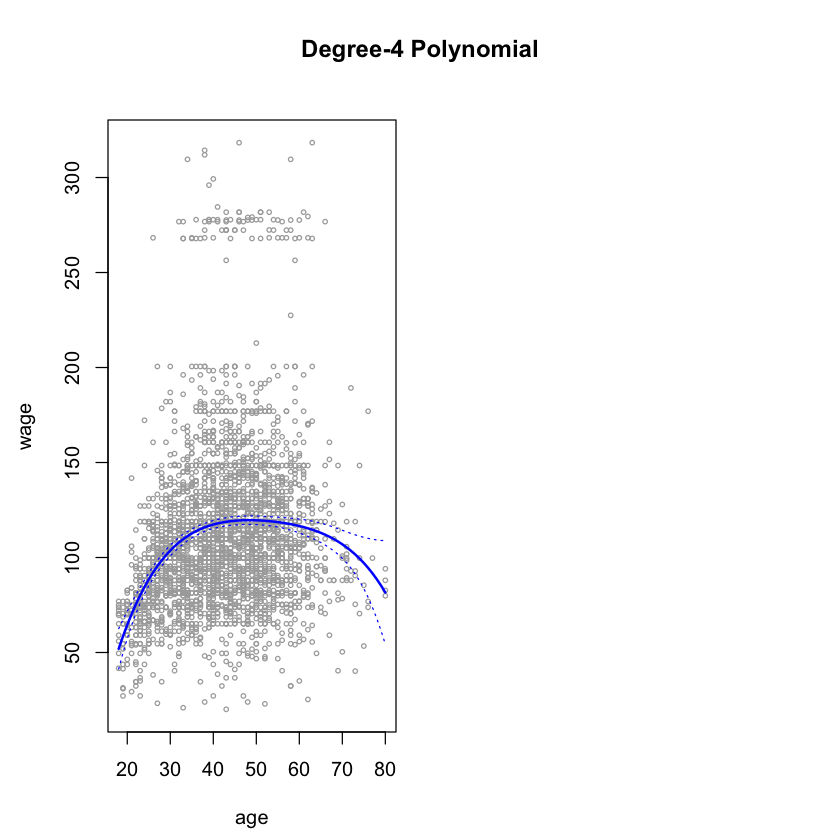

In [4]:
fit2b=lm(wage~cbind(age,age^2,age^3,age^4),data=Wage)
agelims=range(age)
age.grid=seq(from=agelims[1],to=agelims[2])
preds=predict(fit,newdata=list(age=age.grid),se=TRUE)
se.bands=cbind(preds$fit+2*preds$se.fit,preds$fit-2*preds$se.fit)
par(mfrow=c(1,2),mar=c(4.5,4.5,1,1),oma=c(0,0,4,0))
plot(age,wage,xlim=agelims,cex=.5,col="darkgrey")
title("Degree-4 Polynomial",outer=T)
lines(age.grid,preds$fit,lwd=2,col="blue")
matlines(age.grid,se.bands,lwd=1,col="blue",lty=3)

In [5]:
preds2=predict(fit2,newdata=list(age=age.grid),se=TRUE)
max(abs(preds$fit-preds2$fit))

[1] 1.8332e-12

In [6]:
fit.1=lm(wage~age,data=Wage)
fit.2=lm(wage~poly(age,2),data=Wage)
fit.3=lm(wage~poly(age,3),data=Wage)
fit.4=lm(wage~poly(age,4),data=Wage)
fit.5=lm(wage~poly(age,5),data=Wage)

In [7]:
anova(fit.1,fit.2,fit.3,fit.4,fit.5)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
1,2998,5022216,NA,NA,NA,NA
2,2.997000e+03,4.793430e+06,1.000000e+00,2.287860e+05,1.435931e+02,2.367734e-32
3,2.996000e+03,4.777674e+06,1.000000e+00,1.575569e+04,9.888756e+00,1.679213e-03
4,2.995000e+03,4.771604e+06,1.000000e+00,6.070152e+03,3.809813e+00,5.104623e-02
5,2.994000e+03,4.770322e+06,1.000000e+00,1.282563e+03,8.049758e-01,3.696820e-01


In [8]:
coef(summary(fit.5))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),111.7036082,0.7287647,153.2780243,0.0000000
"poly(age, 5)1",4.470679e+02,3.991608e+01,1.120019e+01,1.491111e-28
"poly(age, 5)2",-4.783158e+02,3.991608e+01,-1.198303e+01,2.367734e-32
"poly(age, 5)3",1.255217e+02,3.991608e+01,3.144639e+00,1.679213e-03
"poly(age, 5)4",-77.91118099,39.91608468,-1.95187433,0.05104623
"poly(age, 5)5",-35.8128890,39.9160847,-0.8972045,0.3696820


In [9]:
(-11.983)^2

[1] 143.5923

In [10]:
fit.1=lm(wage~education+age,data=Wage)
fit.2=lm(wage~education+poly(age,2),data=Wage)
fit.3=lm(wage~education+poly(age,3),data=Wage)
anova(fit.1,fit.2,fit.3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
1,2994,3867992,NA,NA,NA,NA
2,2.993000e+03,3.725395e+06,1.000000e+00,1.425971e+05,1.146969e+02,2.728971e-26
3,2.992000e+03,3.719809e+06,1.000000e+00,5.586660e+03,4.493588e+00,3.410431e-02


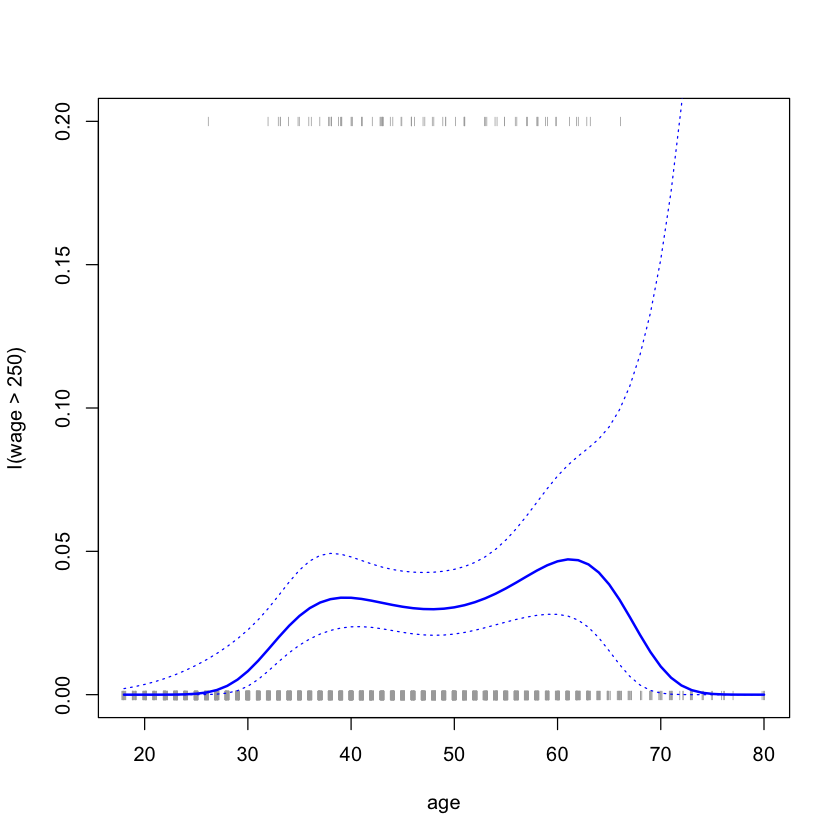

In [11]:
fit=glm(I(wage>250)~poly(age,4),data=Wage,family=binomial)
preds=predict(fit,newdata=list(age=age.grid),se=T)
pfit=exp(preds$fit)/(1+exp(preds$fit))
se.bands.logit = cbind(preds$fit+2*preds$se.fit, preds$fit-2*preds$se.fit)
se.bands = exp(se.bands.logit)/(1+exp(se.bands.logit))
preds=predict(fit,newdata=list(age=age.grid),type="response",se=T)
plot(age,I(wage>250),xlim=agelims,type="n",ylim=c(0,.2))
points(jitter(age), I((wage>250)/5),cex=.5,pch="|",col="darkgrey")
lines(age.grid,pfit,lwd=2, col="blue")
matlines(age.grid,se.bands,lwd=1,col="blue",lty=3)

In [12]:
table(cut(age,4))


(17.9,33.5]   (33.5,49]   (49,64.5] (64.5,80.1] 
        750        1399         779          72 

In [13]:
fit=lm(wage~cut(age,4),data=Wage)
coef(summary(fit))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),94.158392,1.476069,63.789970,0.000000
"cut(age, 4)(33.5,49]",2.405349e+01,1.829431e+00,1.314807e+01,1.982315e-38
"cut(age, 4)(49,64.5]",2.366456e+01,2.067958e+00,1.144344e+01,1.040750e-29
"cut(age, 4)(64.5,80.1]",7.640592,4.987424,1.531972,0.125635


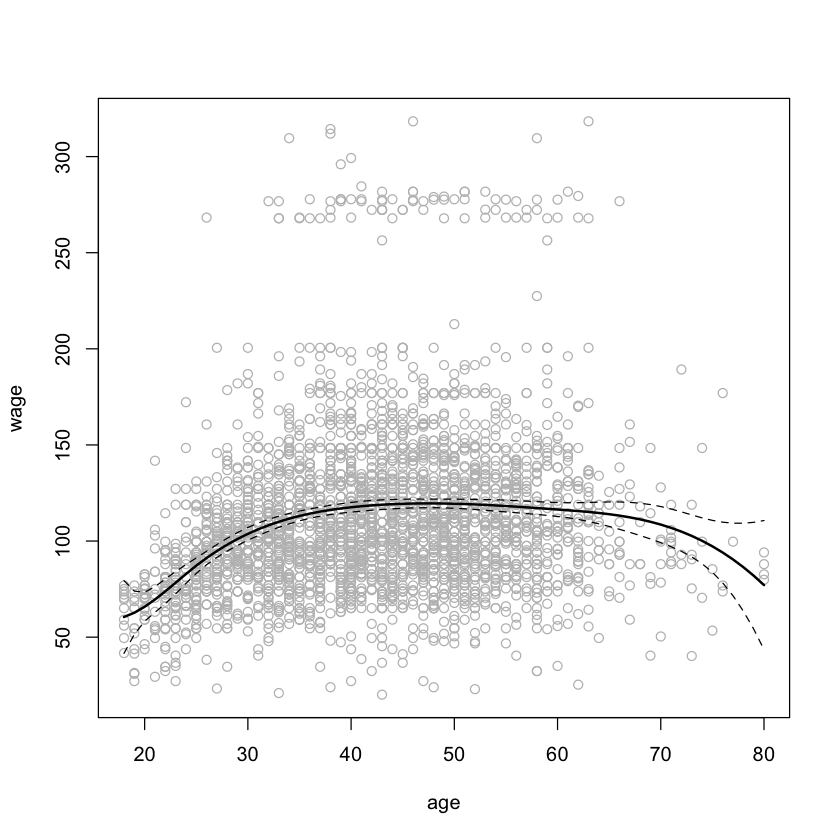

In [14]:
# Splines

library(splines)
fit=lm(wage~bs(age,knots=c(25,40,60)),data=Wage)
pred=predict(fit,newdata=list(age=age.grid),se=T)
plot(age,wage,col="gray")
lines(age.grid,pred$fit,lwd=2)
lines(age.grid,pred$fit+2*pred$se,lty="dashed")
lines(age.grid,pred$fit-2*pred$se,lty="dashed")

In [15]:
dim(bs(age,knots=c(25,40,60)))
dim(bs(age,df=6))
attr(bs(age,df=6),"knots")
fit2=lm(wage~ns(age,df=4),data=Wage)
pred2=predict(fit2,newdata=list(age=age.grid),se=T)
lines(age.grid, pred2$fit,col="red",lwd=2)

[1] 3000    6

[1] 3000    6

25%   50%   75% 
33.75 42.00 51.00

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


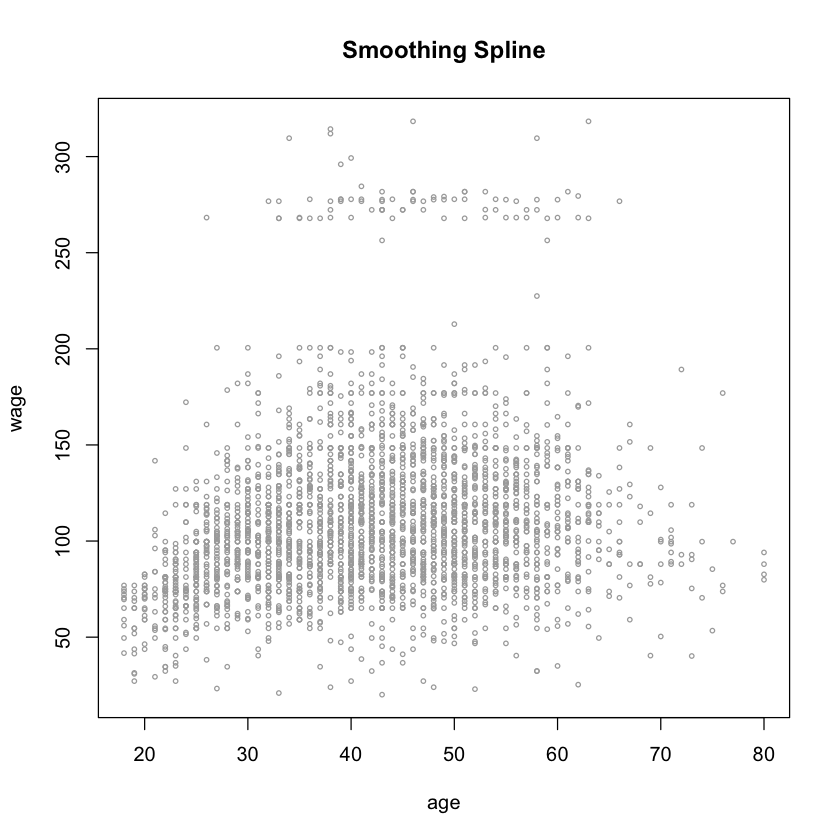

In [16]:
plot(age,wage,xlim=agelims,cex=.5,col="darkgrey")
title("Smoothing Spline")

In [17]:
fit=smooth.spline(age,wage,df=16)
fit2=smooth.spline(age,wage,cv=TRUE)
fit2$df
lines(fit,col="red",lwd=2)
lines(fit2,col="blue",lwd=2)
legend("topright",legend=c("16 DF","6.8 DF"),col=c("red","blue"),lty=1,lwd=2,cex=.8)

Warning message:
In smooth.spline(age, wage, cv = TRUE): cross-validation with non-unique 'x' values seems doubtful

[1] 6.794596

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


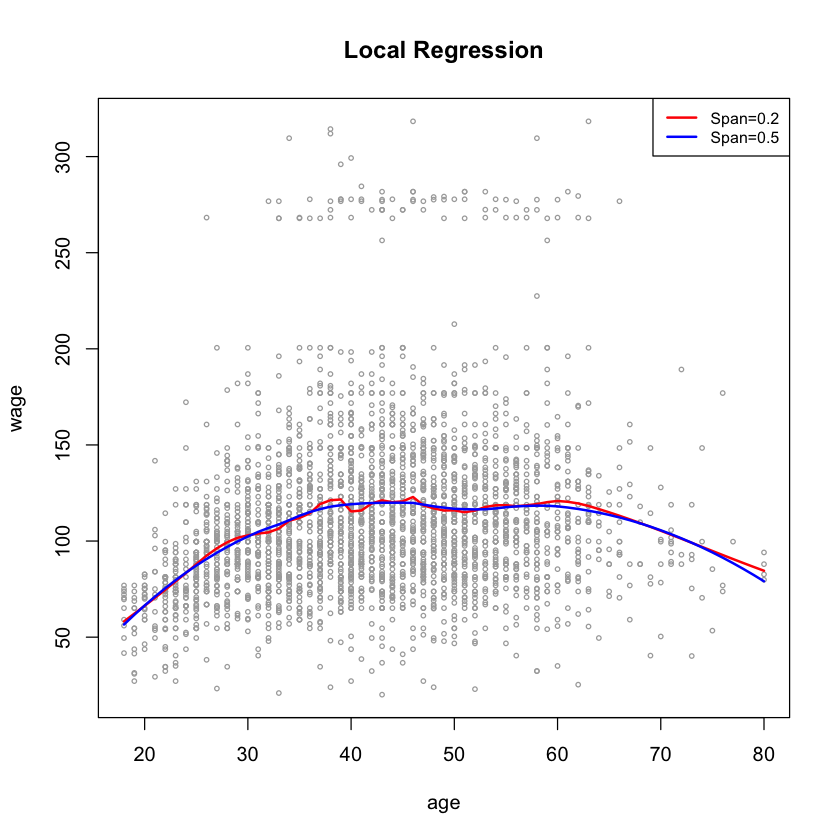

In [18]:
plot(age,wage,xlim=agelims,cex=.5,col="darkgrey")
title("Local Regression")
fit=loess(wage~age,span=.2,data=Wage)
fit2=loess(wage~age,span=.5,data=Wage)
lines(age.grid,predict(fit,data.frame(age=age.grid)),col="red",lwd=2)
lines(age.grid,predict(fit2,data.frame(age=age.grid)),col="blue",lwd=2)
legend("topright",legend=c("Span=0.2","Span=0.5"),col=c("red","blue"),lty=1,lwd=2,cex=.8)

In [19]:
# GAMs

gam1=lm(wage~ns(year,4)+ns(age,5)+education,data=Wage)
library(gam)
gam.m3=gam(wage~s(year,4)+s(age,5)+education,data=Wage)

Loading required package: foreach
Loaded gam 1.12



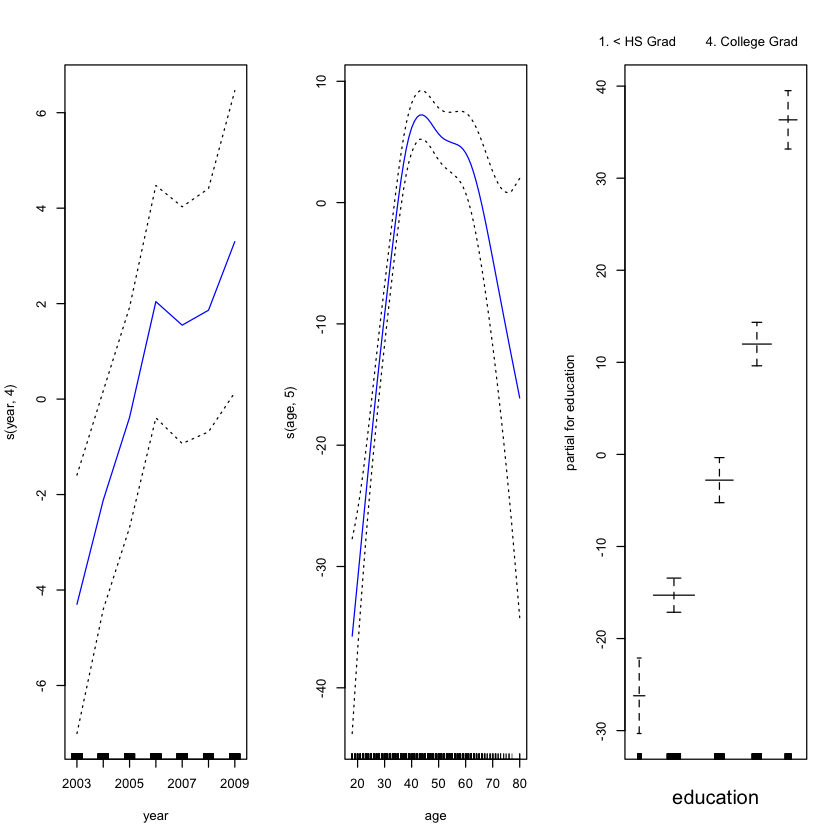

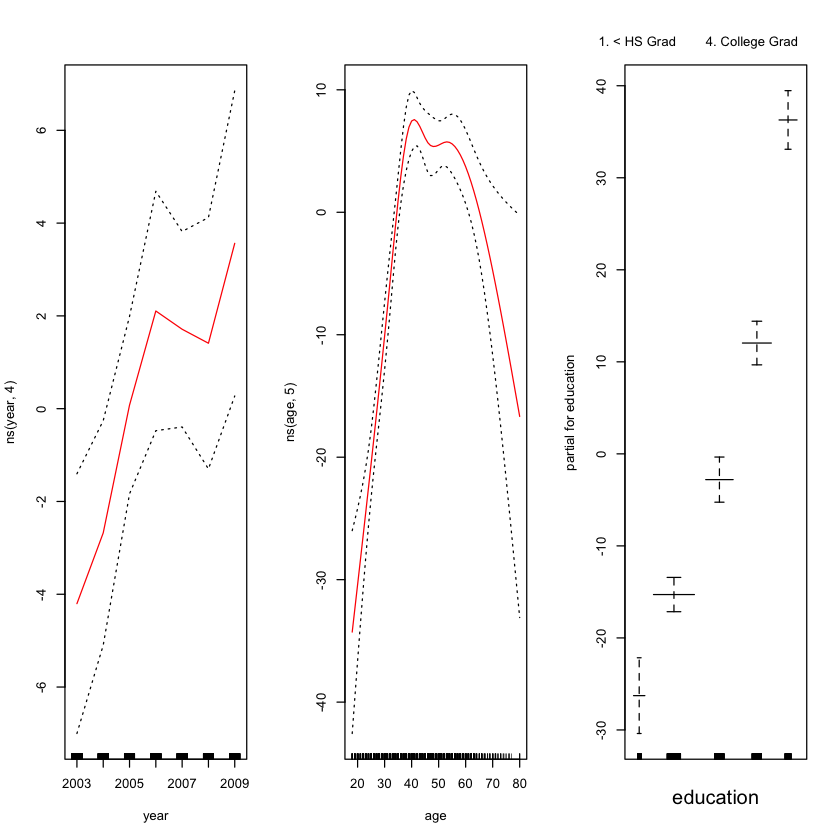

In [20]:
par(mfrow=c(1,3))
plot(gam.m3, se=TRUE,col="blue")
plot.gam(gam1, se=TRUE, col="red")
gam.m1=gam(wage~s(age,5)+education,data=Wage)
gam.m2=gam(wage~year+s(age,5)+education,data=Wage)

In [21]:
anova(gam.m1,gam.m2,gam.m3,test="F")

,Resid. Df,Resid. Dev,Df,Deviance,F,Pr(>F)
1,2990,3711731,NA,NA,NA,NA
2,2.989000e+03,3.693842e+06,1.000000e+00,1.788924e+04,1.447713e+01,1.447167e-04
3,2.986000e+03,3.689770e+06,2.999989e+00,4.071134e+03,1.098212e+00,3.485661e-01


In [22]:
summary(gam.m3)


Call: gam(formula = wage ~ s(year, 4) + s(age, 5) + education, data = Wage)
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-119.43  -19.70   -3.33   14.17  213.48 

(Dispersion Parameter for gaussian family taken to be 1235.69)

    Null Deviance: 5222086 on 2999 degrees of freedom
Residual Deviance: 3689770 on 2986 degrees of freedom
AIC: 29887.75 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
             Df  Sum Sq Mean Sq F value    Pr(>F)    
s(year, 4)    1   27162   27162  21.981 2.877e-06 ***
s(age, 5)     1  195338  195338 158.081 < 2.2e-16 ***
education     4 1069726  267432 216.423 < 2.2e-16 ***
Residuals  2986 3689770    1236                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Anova for Nonparametric Effects
            Npar Df Npar F  Pr(F)    
(Intercept)                          
s(year, 4)        3  1.086 0.3537    
s(age, 5)         4 32.380 <2e-16 ***
education                            
---

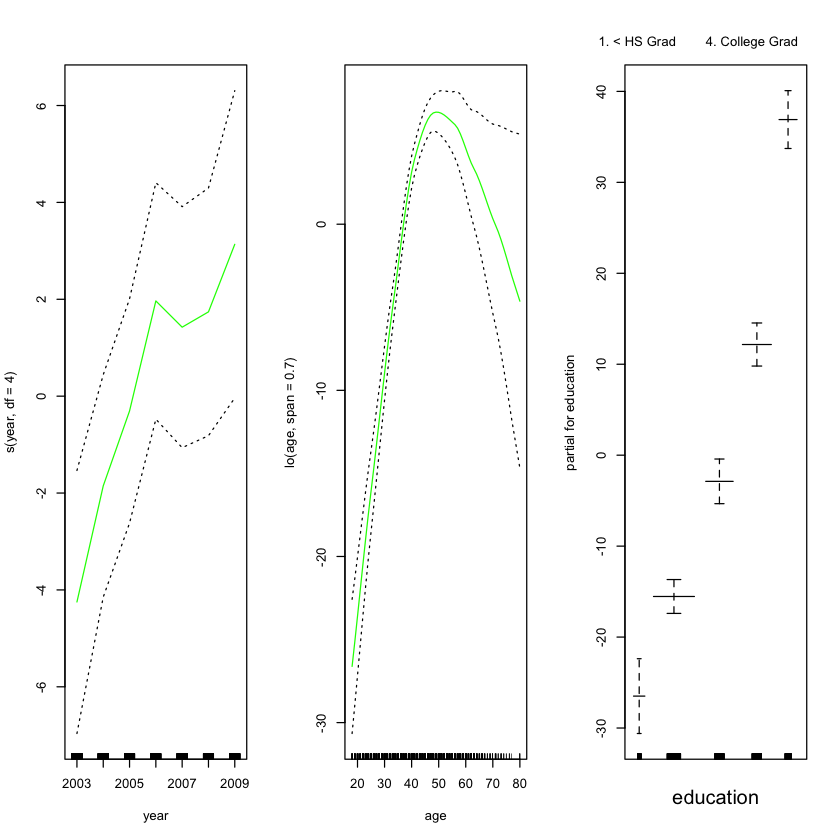

In [23]:
par(mfrow=c(1,3))
preds=predict(gam.m2,newdata=Wage)
gam.lo=gam(wage~s(year,df=4)+lo(age,span=0.7)+education,data=Wage)
plot.gam(gam.lo, se=TRUE, col="green")
gam.lo.i=gam(wage~lo(year,age,span=0.5)+education,data=Wage)

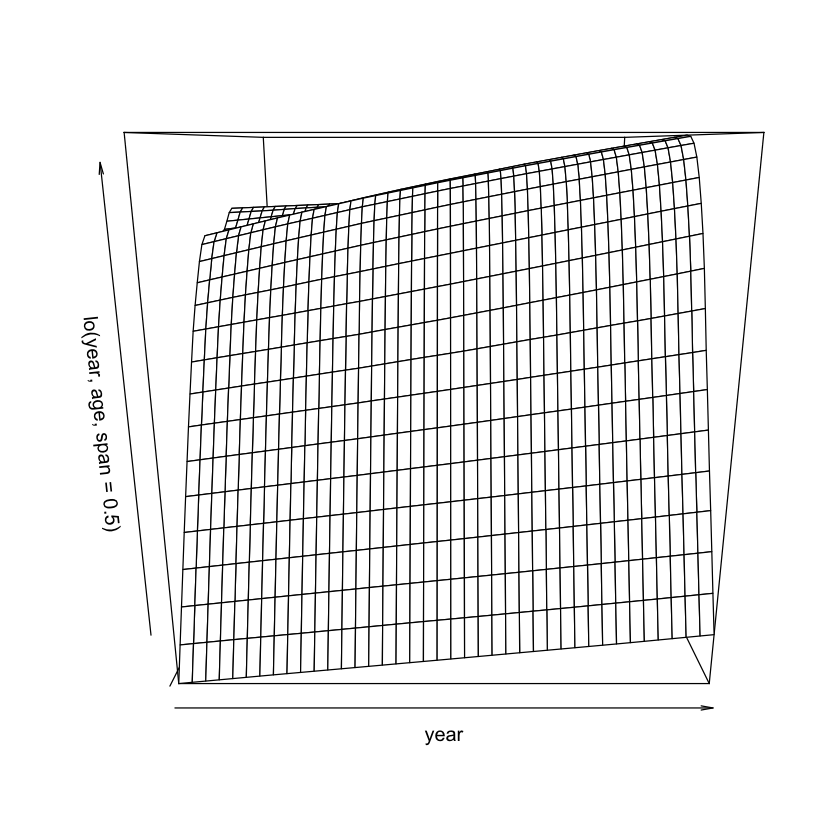

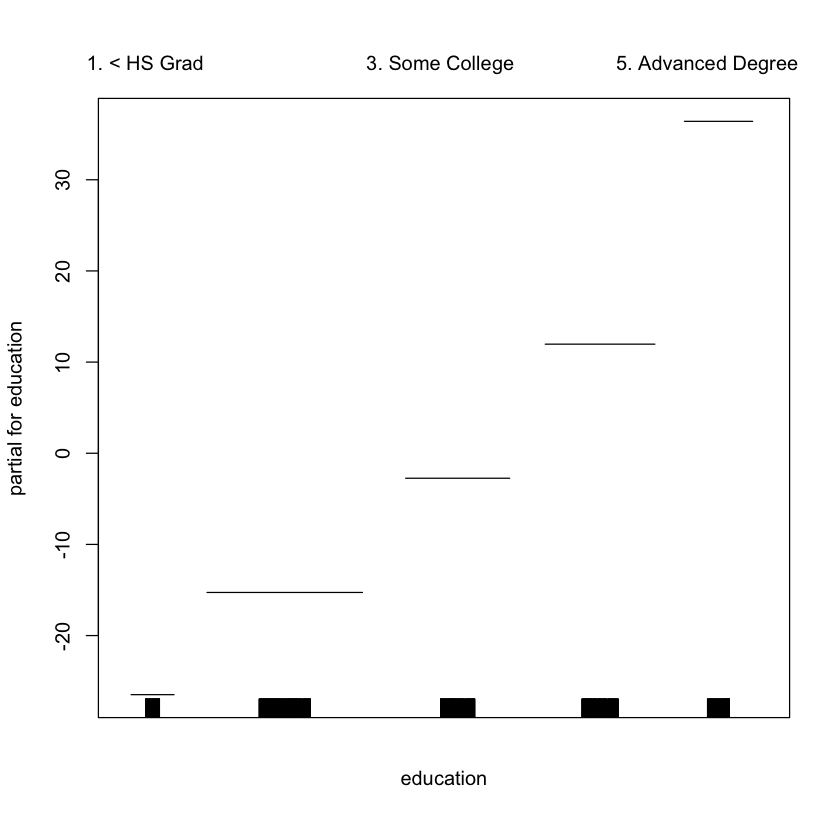

In [24]:
library(akima)
plot(gam.lo.i)
gam.lr=gam(I(wage>250)~year+s(age,df=5)+education,family=binomial,data=Wage)

                    
education            FALSE TRUE
  1. < HS Grad         268    0
  2. HS Grad           966    5
  3. Some College      643    7
  4. College Grad      663   22
  5. Advanced Degree   381   45

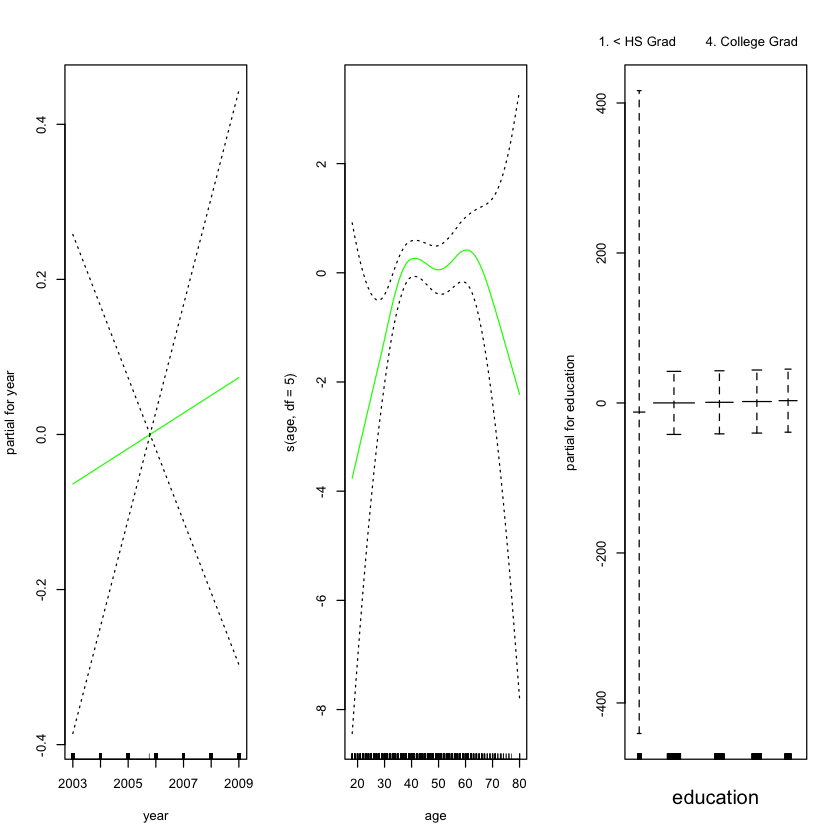

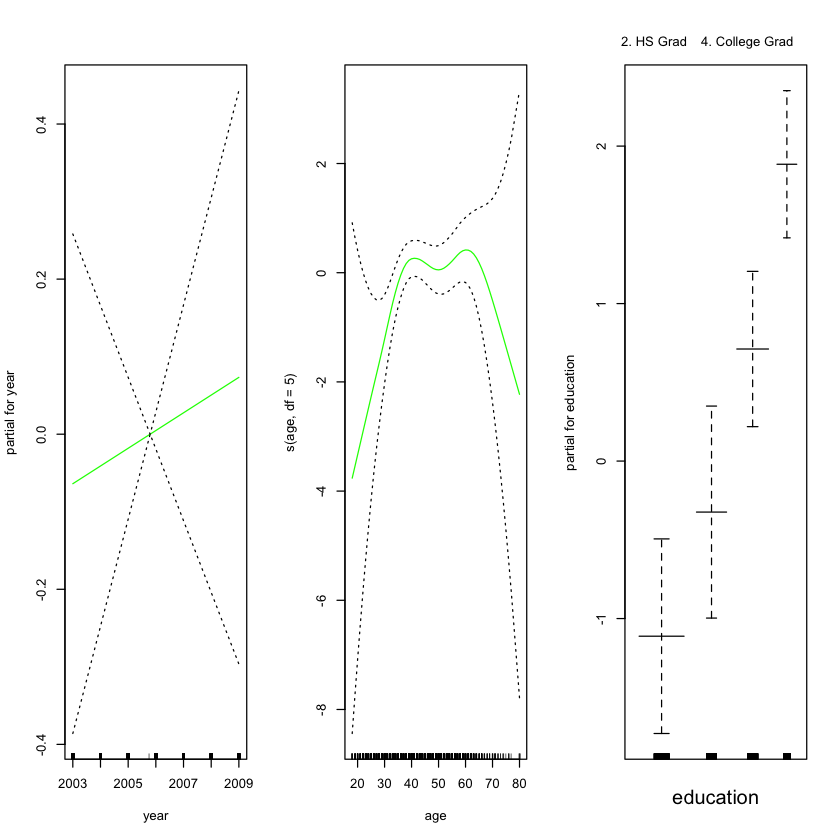

In [25]:
par(mfrow=c(1,3))
plot(gam.lr,se=T,col="green")
table(education,I(wage>250))
gam.lr.s=gam(I(wage>250)~year+s(age,df=5)+education,family=binomial,data=Wage,subset=(education!="1. < HS Grad"))
plot(gam.lr.s,se=T,col="green")